# Introduction

For starters we will use ten different actors, denoted by different video id:s.


We will apply LOGO CV (Leave One Group Out cross-validation)

We will later have to take into account variables like mode (prosody or vocalization) and intensity (1-4) in the cross validation scheme. 

However for the first run it will be fine to include all without taking such factors into account.



In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy

In [2]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [4]:
# path to save figures
output_path = '../../files/out/'

# Global configuration path
glob_conf_path = '../global_config.py'

In [2]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [4]:
# path to save figures
output_path = '../../files/out/'

# Global configuration path
glob_conf_path = '../global_config.py'

# Load global variables

In [5]:
exec(open(glob_conf_path).read())

# Select data from DB

We only select data that satisfies following three conditions:

* Success == 1
* Confidence rate >= 0.98
* mix (mixed emotions) = False(0)

We also only select the following six video_ids: 'A101', 'A102', 'A18', 'A200'

In [6]:
query = """SELECT filename,
video_id,
emotion_1,
emotion_1_id,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface
WHERE success = 1 AND confidence >= 0.98 AND mix = 0
AND video_id IN ('A101', 'A102', 'A18', 'A200')
AND emotion_1 in ('sad',      
                    'dou',
                    'gui',
                    'sha',
                    'disa',
                    'reg',
                    'fea',
                    'awe',
                    'env');"""

df, read_duration = execute_sql_pandas(query)

In [7]:
print("query executed in: {} seconds".format(read_duration))

query executed in: 41.727 seconds


In [8]:
df

,filename,video_id,emotion_1,emotion_1_id,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A18_disa_p_1,A18,disa,37,0.0,0.0,0.50,0.12,0.21,0.43,...,0.00,0.52,1.39,0.00,0.39,0.61,0.77,0.0,0.10,0.00
1,A18_disa_p_1,A18,disa,37,0.0,0.0,0.52,0.05,0.17,0.46,...,0.00,0.41,1.58,0.00,0.32,0.61,0.66,0.0,0.09,0.00
2,A18_disa_p_1,A18,disa,37,0.0,0.0,0.51,0.01,0.15,0.38,...,0.03,0.34,1.78,0.00,0.32,0.66,0.52,0.0,0.06,0.01
3,A18_disa_p_1,A18,disa,37,0.0,0.0,0.47,0.00,0.18,0.30,...,0.03,0.28,1.88,0.00,0.37,0.74,0.38,0.0,0.00,0.05
4,A18_disa_p_1,A18,disa,37,0.0,0.0,0.47,0.00,0.18,0.27,...,0.08,0.27,1.91,0.00,0.40,0.67,0.27,0.0,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70093,A101_disa_p_1,A101,disa,37,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.11,0.47,0.32,1.94,0.21,0.92,0.0,0.08,0.02
70094,A101_disa_p_1,A101,disa,37,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.10,0.50,0.23,1.97,0.18,0.90,0.0,0.11,0.02
70095,A101_disa_p_1,A101,disa,37,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.10,0.47,0.18,1.96,0.18,0.89,0.0,0.12,0.00
70096,A101_disa_p_1,A101,disa,37,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.07,0.39,0.17,1.93,0.22,0.87,0.0,0.13,0.00


Total number of instances: 70098

Number of Instances per File (before data cleaning)
A102_sad_v_4     644
A102_reg_v_4     598
A102_env_v_2     523
A102_fea_v_2     520
A200_reg_p_3     506
                ... 
A18_env_v_1       91
A200_disa_p_2     82
A18_sha_v_1       81
A200_gui_p_3      69
A18_sha_v_2       62
Name: filename, Length: 287, dtype: int64



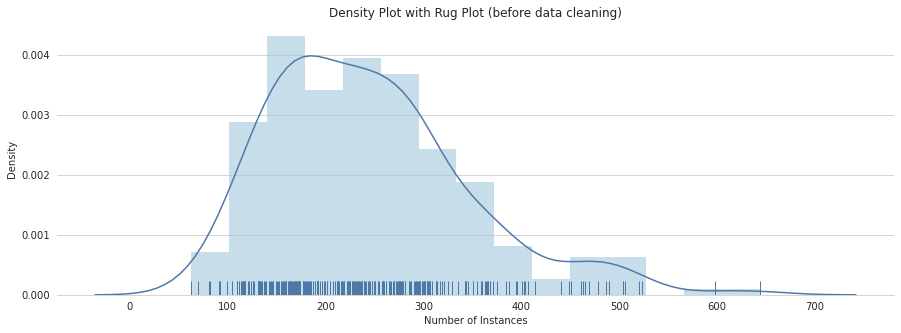


Number of Instances per Video id (before data cleaning)
A102    24589
A101    17076
A200    15860
A18     12573
Name: video_id, dtype: int64


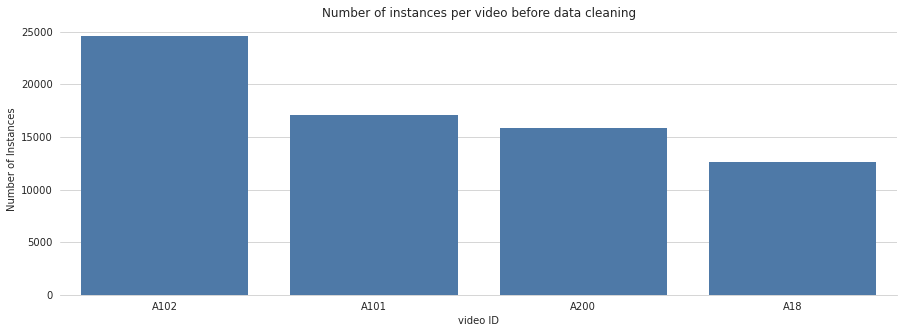


Number of Instances per Emotion (before data cleaning)
sad     9032
gui     7953
fea     7864
reg     7742
disa    7609
sha     7563
awe     7563
dou     7548
env     7224
Name: emotion_1, dtype: int64


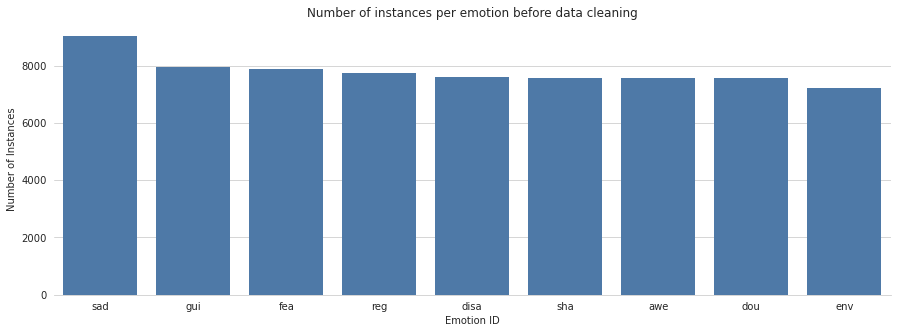

In [9]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Video id (before data cleaning)")
video_val_counts_original = df["video_id"].value_counts()
print(video_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(video_val_counts_original.index, video_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per video before data cleaning")
plt.xlabel('video ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()

Lets see how many files we have per video id

In [10]:
print("Number of Instances per video id for every filename")
video_val_counts_original = df[['video_id','filename']].groupby(["video_id"]).filename.nunique().reset_index()
print(video_val_counts_original)
print()

Number of Instances per video id for every filename
  video_id  filename
0     A101        72
1     A102        72
2      A18        72
3     A200        71



# From time series data to average features

In [11]:
from scipy.signal import find_peaks

def my_find_peaks(x):
    """
    This function takes a 1-D array and finds all local maxima by simple comparison of neighboring values. 
    Optionally, a subset of these peaks can be selected by specifying conditions for a peak’s properties.
    """
    th = x.mean()
    val = x.values
    peaks, _ = find_peaks(val, height=th)
    return len(peaks)

In [12]:
df_tmp = df.drop(columns=["video_id", "emotion_1", "emotion_1_id"])

# Compute statistical measures 
df_tmp = df_tmp.groupby(['filename']).agg(['mean',                                    # Arithmetic mean
                                          lambda x: scipy.stats.variation(x),        # Coefficient of variation
                                          lambda x: np.percentile(x, q=20),          # 20th percentile, i.e. below this value 20% of the observations will be found
                                          lambda x: np.percentile(x, q=50),          # 50th percentile, i.e. below this value 50% of the observations will be found
                                          lambda x: np.percentile(x, q=80),          # 80th percentile, i.e. below this value 80% of the observations will be found
                                          lambda x: scipy.stats.iqr(x, rng=(20,80)), # IQR(60%) = 80th percentile - 20th percentile
                                          lambda x: my_find_peaks(x),                # Number of peaks above the adaptive threshold
                                          ]).reset_index().sort_values(by=['filename'], ignore_index=True)

# Rename columns
df_tmp.rename(columns={'<lambda_0>': 'stddevNorm',
                       '<lambda_1>': 'percentile20.0',
                       '<lambda_2>': 'percentile50.0',
                       '<lambda_3>': 'percentile80.0',
                       '<lambda_4>': 'iqr60_80-20',
                       '<lambda_5>': 'numPeaks',
                      }, level=1,inplace=True)

# Impute NaN values
# There might be some NaN values in the dataframe coming from the coefficient of variation (std(x)/mean(x) when mean(x)=0) 
df_tmp.fillna(0, inplace=True)

# Collapse hierarchical index in columns
df_tmp.columns = ['_'.join(col).strip('_') for col in df_tmp.columns.values]

# check for null values
df_tmp.isnull().values.any()

/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesi

False

In [13]:
df_tmp

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A101_awe_p_1,0.057556,1.372651,0.0,0.01,0.112,0.112,17,0.045111,1.960022,...,0.866,0.866,14,0.184400,2.199272,0.0,0.01,0.328,0.328,8
1,A101_awe_p_2,0.193511,1.429773,0.0,0.00,0.420,0.420,17,0.075862,2.145240,...,0.454,0.424,17,0.355893,2.317513,0.0,0.00,0.304,0.304,6
2,A101_awe_p_3,0.176221,1.577754,0.0,0.00,0.360,0.360,16,0.085016,2.099122,...,0.430,0.430,21,0.288339,2.614992,0.0,0.00,0.318,0.318,12
3,A101_awe_p_4,0.099599,1.351913,0.0,0.00,0.220,0.220,21,0.045886,2.115329,...,0.740,0.740,32,0.103144,1.515045,0.0,0.00,0.214,0.214,23
4,A101_awe_v_1,0.037840,1.460093,0.0,0.01,0.070,0.070,17,0.023662,1.859920,...,0.610,0.610,17,0.046620,1.377928,0.0,0.01,0.090,0.090,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,A200_sha_p_4,0.245789,1.388516,0.0,0.00,0.566,0.566,18,0.082794,2.037023,...,0.900,0.900,31,0.311336,1.713870,0.0,0.00,0.578,0.578,12
283,A200_sha_v_1,0.213248,1.798074,0.0,0.02,0.360,0.360,11,0.117222,2.692941,...,0.494,0.494,24,0.262735,1.388265,0.0,0.00,0.682,0.682,15
284,A200_sha_v_2,0.050339,1.356386,0.0,0.02,0.090,0.090,15,0.045198,1.803755,...,0.280,0.278,24,0.333559,1.626170,0.0,0.01,0.846,0.846,7
285,A200_sha_v_3,0.312576,1.555343,0.0,0.02,0.872,0.872,9,0.201288,1.916179,...,0.668,0.664,11,0.201364,1.725719,0.0,0.02,0.346,0.346,10


# Normalize training set

Merge on filename index... Merge with metadata afterwards...

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [14]:
from sklearn import preprocessing

# create a separate dataframe to keep track of index
df_filename = df_tmp[["filename"]]

# get only features
X = df_tmp.drop(columns=['filename'])

min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform features
X_scaled = min_max_scaler.fit_transform(X)

# Create a dataframe from normalized features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())

# join back on index with filename dataframe
X_scaled_df = df_filename.join(X_scaled_df)

In [15]:
X_scaled_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A101_awe_p_1,0.019791,0.415045,0.0,0.166667,0.017073,1.707317e-02,0.283019,0.063178,0.390415,...,0.342452,0.343117,0.232558,0.113288,0.509097,0.0,0.166667,0.060870,0.060870,0.175
1,A101_awe_p_2,0.156271,0.453757,0.0,0.000000,0.142276,1.422764e-01,0.283019,0.143491,0.494554,...,0.133739,0.119433,0.302326,0.254296,0.565756,0.0,0.000000,0.054731,0.054731,0.125
2,A101_awe_p_3,0.138915,0.554042,0.0,0.000000,0.117886,1.178862e-01,0.264151,0.167399,0.468624,...,0.121581,0.122470,0.395349,0.198750,0.708303,0.0,0.000000,0.058312,0.058312,0.275
3,A101_awe_p_4,0.061996,0.400991,0.0,0.000000,0.060976,6.097561e-02,0.358491,0.065202,0.477737,...,0.278622,0.279352,0.651163,0.046476,0.181229,0.0,0.000000,0.031714,0.031714,0.550
4,A101_awe_v_1,0.000000,0.474304,0.0,0.166667,0.000000,6.938894e-18,0.283019,0.007159,0.334133,...,0.212766,0.213563,0.302326,0.000000,0.115525,0.0,0.166667,0.000000,0.000000,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,A200_sha_p_4,0.208751,0.425797,0.0,0.000000,0.201626,2.016260e-01,0.301887,0.161594,0.433710,...,0.359676,0.360324,0.627907,0.217659,0.276501,0.0,0.000000,0.124808,0.124808,0.275
283,A200_sha_v_1,0.176084,0.703351,0.0,0.333333,0.117886,1.178862e-01,0.169811,0.251512,0.802499,...,0.154002,0.154858,0.465116,0.177698,0.120478,0.0,0.000000,0.151407,0.151407,0.350
284,A200_sha_v_2,0.012547,0.404022,0.0,0.333333,0.008130,8.130081e-03,0.245283,0.063404,0.302554,...,0.045593,0.045547,0.465116,0.235932,0.234478,0.0,0.166667,0.193350,0.193350,0.150
285,A200_sha_v_3,0.275795,0.538854,0.0,0.333333,0.326016,3.260163e-01,0.132075,0.471069,0.365765,...,0.242148,0.240891,0.162791,0.127236,0.282179,0.0,0.333333,0.065473,0.065473,0.225


In [16]:
# get the metadata from original dataframe
df_metadata = df[["filename", "video_id", "emotion_1_id"]]

# drop all duplicate rows, will collapse dataframe to unique filenames
df_metadata = df_metadata.drop_duplicates()

# merge metadata with temporary dataframe
train_scaled_df = pd.merge(X_scaled_df, df_metadata, on="filename")

In [17]:
train_scaled_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks,video_id,emotion_1_id
0,A101_awe_p_1,0.019791,0.415045,0.0,0.166667,0.017073,1.707317e-02,0.283019,0.063178,0.390415,...,0.232558,0.113288,0.509097,0.0,0.166667,0.060870,0.060870,0.175,A101,18
1,A101_awe_p_2,0.156271,0.453757,0.0,0.000000,0.142276,1.422764e-01,0.283019,0.143491,0.494554,...,0.302326,0.254296,0.565756,0.0,0.000000,0.054731,0.054731,0.125,A101,18
2,A101_awe_p_3,0.138915,0.554042,0.0,0.000000,0.117886,1.178862e-01,0.264151,0.167399,0.468624,...,0.395349,0.198750,0.708303,0.0,0.000000,0.058312,0.058312,0.275,A101,18
3,A101_awe_p_4,0.061996,0.400991,0.0,0.000000,0.060976,6.097561e-02,0.358491,0.065202,0.477737,...,0.651163,0.046476,0.181229,0.0,0.000000,0.031714,0.031714,0.550,A101,18
4,A101_awe_v_1,0.000000,0.474304,0.0,0.166667,0.000000,6.938894e-18,0.283019,0.007159,0.334133,...,0.302326,0.000000,0.115525,0.0,0.166667,0.000000,0.000000,0.475,A101,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,A200_sha_p_4,0.208751,0.425797,0.0,0.000000,0.201626,2.016260e-01,0.301887,0.161594,0.433710,...,0.627907,0.217659,0.276501,0.0,0.000000,0.124808,0.124808,0.275,A200,43
283,A200_sha_v_1,0.176084,0.703351,0.0,0.333333,0.117886,1.178862e-01,0.169811,0.251512,0.802499,...,0.465116,0.177698,0.120478,0.0,0.000000,0.151407,0.151407,0.350,A200,43
284,A200_sha_v_2,0.012547,0.404022,0.0,0.333333,0.008130,8.130081e-03,0.245283,0.063404,0.302554,...,0.465116,0.235932,0.234478,0.0,0.166667,0.193350,0.193350,0.150,A200,43
285,A200_sha_v_3,0.275795,0.538854,0.0,0.333333,0.326016,3.260163e-01,0.132075,0.471069,0.365765,...,0.162791,0.127236,0.282179,0.0,0.333333,0.065473,0.065473,0.225,A200,43


# Create groups for LOGO CV

We will apply LOGO CV (Leave One Group Out cross-validation)

In [18]:
train_scaled_df.video_id.unique()

array(['A101', 'A102', 'A18', 'A200'], dtype=object)

In [19]:
import random

video_ids = train_scaled_df.video_id.unique()
number_of_video_ids = len(video_ids)

# Find random pairs of video_ids
random.seed(seed)

# a list of even numbers
video_ids_1 = [n for n in range(number_of_video_ids) if n % 2 == 0]

# a list of odd numbers
video_ids_2 = [n+1 for n in video_ids_1]

# shuffle the odd numbers
video_ids_2_shuffled = random.sample(video_ids_2, len(video_ids_2))

# assign groups for video ids by using odd and even numbers respectively
groups = {}
for i, actor in enumerate(video_ids_1):
    groups[video_ids[actor]] = i
    
for i, actor in enumerate(video_ids_2_shuffled):
    groups[video_ids[actor]] = i
    
print(groups)

# Create a copy
train_scaled_groups_df = train_scaled_df.copy()

# Insert group column
train_scaled_groups_df['group'] = train_scaled_groups_df['video_id'].map(groups)

{'A101': 0, 'A18': 1, 'A200': 0, 'A102': 1}


In [20]:
train_scaled_groups_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks,video_id,emotion_1_id,group
0,A101_awe_p_1,0.019791,0.415045,0.0,0.166667,0.017073,1.707317e-02,0.283019,0.063178,0.390415,...,0.113288,0.509097,0.0,0.166667,0.060870,0.060870,0.175,A101,18,0
1,A101_awe_p_2,0.156271,0.453757,0.0,0.000000,0.142276,1.422764e-01,0.283019,0.143491,0.494554,...,0.254296,0.565756,0.0,0.000000,0.054731,0.054731,0.125,A101,18,0
2,A101_awe_p_3,0.138915,0.554042,0.0,0.000000,0.117886,1.178862e-01,0.264151,0.167399,0.468624,...,0.198750,0.708303,0.0,0.000000,0.058312,0.058312,0.275,A101,18,0
3,A101_awe_p_4,0.061996,0.400991,0.0,0.000000,0.060976,6.097561e-02,0.358491,0.065202,0.477737,...,0.046476,0.181229,0.0,0.000000,0.031714,0.031714,0.550,A101,18,0
4,A101_awe_v_1,0.000000,0.474304,0.0,0.166667,0.000000,6.938894e-18,0.283019,0.007159,0.334133,...,0.000000,0.115525,0.0,0.166667,0.000000,0.000000,0.475,A101,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,A200_sha_p_4,0.208751,0.425797,0.0,0.000000,0.201626,2.016260e-01,0.301887,0.161594,0.433710,...,0.217659,0.276501,0.0,0.000000,0.124808,0.124808,0.275,A200,43,0
283,A200_sha_v_1,0.176084,0.703351,0.0,0.333333,0.117886,1.178862e-01,0.169811,0.251512,0.802499,...,0.177698,0.120478,0.0,0.000000,0.151407,0.151407,0.350,A200,43,0
284,A200_sha_v_2,0.012547,0.404022,0.0,0.333333,0.008130,8.130081e-03,0.245283,0.063404,0.302554,...,0.235932,0.234478,0.0,0.166667,0.193350,0.193350,0.150,A200,43,0
285,A200_sha_v_3,0.275795,0.538854,0.0,0.333333,0.326016,3.260163e-01,0.132075,0.471069,0.365765,...,0.127236,0.282179,0.0,0.333333,0.065473,0.065473,0.225,A200,43,0


In [21]:
save_path = os.path.join(output_path, "video", 'video_data_intensity_train.csv')
train_scaled_groups_df.to_csv(save_path, index=None, header=True)